# **3.0 DATA PREPARATION**

 ## **1. IMPORT DATA**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets


In [ ]:
#Load the data
car = pd.read_csv("/content/cars_for_sale(cleaned).csv")


In [ ]:
car.head()

,Make,Year,Condition,Mileage,Price,Seller Rating,Seller Rating Count,Interior color,Drivetrain,Min MPG,...,1-owner vehicle,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
0,Lexus,2024,New,0.0,112865.0,4.7,1261.0,Black,Rear-wheel Drive,15.0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Acura,2007,Used,61110.0,11295.0,4.2,440.0,–,Front-wheel Drive,22.0,...,True,True,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,McLaren,2016,Used,6305.0,219997.0,3.1,421.0,Carbon Black,Rear-wheel Drive,NaN,...,False,False,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
3,Audi,2016,Used,65715.0,23999.0,3.6,123.0,Black,All-wheel Drive,23.0,...,False,True,True,0,3.0,5.0,5.0,5.0,5.0,5.0
4,BMW,2018,Used,19830.0,39799.0,4.4,91.0,Black,All-wheel Drive,0.0,...,True,False,True,0,5.0,5.0,5.0,5.0,5.0,5.0


## **2. DATA UNDERSTANDING**

In [ ]:
#quick summary
car.describe()

,Year,Mileage,Price,Seller Rating,Seller Rating Count,Min MPG,Max MPG,Engine Size (L),Accidents or damage,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
count,9016.000000,8867.000000,9.016000e+03,7661.000000,7661.000000,7421.000000,7421.000000,8251.000000,5400.000000,9016.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4310.000000
mean,2019.456300,36301.668546,4.008421e+04,4.381504,1432.193578,20.775771,26.510982,2.964659,0.330000,0.071761,4.598495,4.563383,4.543776,4.407889,4.727086,4.484455
std,6.449194,44208.902388,4.259945e+04,0.609913,1592.647184,7.217294,8.593017,1.325837,0.470256,0.258107,0.838355,0.818943,0.865939,1.028365,0.697989,1.039983
min,1959.000000,0.000000,1.997000e+03,1.300000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2017.000000,10.000000,2.149000e+04,4.200000,235.000000,17.000000,24.000000,2.000000,0.000000,0.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000
50%,2022.000000,18944.000000,3.238300e+04,4.600000,990.000000,21.000000,28.000000,2.500000,0.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,2024.000000,62501.000000,4.899100e+04,4.800000,2044.000000,25.000000,32.000000,3.600000,1.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,2025.000000,324349.000000,1.699800e+06,5.000000,11663.000000,150.000000,122.000000,8.400000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
# Checking the number of rows and columns
print(car.shape)

(9016, 24)


In [ ]:
# Displaying column names
print(car.columns)

Index(['Make', 'Year', 'Condition', 'Mileage', 'Price', 'Seller Rating',
       'Seller Rating Count', 'Interior color', 'Drivetrain', 'Min MPG',
       'Max MPG', 'Fuel type', 'Engine Size (L)', 'Accidents or damage',
       '1-owner vehicle', 'Personal use only', 'Clean title', 'Open recall',
       'Comfort_score', 'Interior_score', 'Performance_score', 'Value_score',
       'Exterior_score', 'Reliability_score'],
      dtype='object')


In [ ]:
# Checking the data types of each column
print(car.dtypes)

Make                    object
Year                     int64
Condition               object
Mileage                float64
Price                  float64
Seller Rating          float64
Seller Rating Count    float64
Interior color          object
Drivetrain              object
Min MPG                float64
Max MPG                float64
Fuel type               object
Engine Size (L)        float64
Accidents or damage    float64
1-owner vehicle         object
Personal use only       object
Clean title             object
Open recall              int64
Comfort_score          float64
Interior_score         float64
Performance_score      float64
Value_score            float64
Exterior_score         float64
Reliability_score      float64
dtype: object


In [ ]:
# Getting more information about the DataFrame
print(car.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9016 entries, 0 to 9015
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 9016 non-null   object 
 1   Year                 9016 non-null   int64  
 2   Condition            9016 non-null   object 
 3   Mileage              8867 non-null   float64
 4   Price                9016 non-null   float64
 5   Seller Rating        7661 non-null   float64
 6   Seller Rating Count  7661 non-null   float64
 7   Interior color       9016 non-null   object 
 8   Drivetrain           9016 non-null   object 
 9   Min MPG              7421 non-null   float64
 10  Max MPG              7421 non-null   float64
 11  Fuel type            8441 non-null   object 
 12  Engine Size (L)      8251 non-null   float64
 13  Accidents or damage  5400 non-null   float64
 14  1-owner vehicle      5374 non-null   object 
 15  Personal use only    5400 non-null   o

In [ ]:
# Displaying unique values for categorical columns
for column in car.select_dtypes(include=['object']).columns:
    print(f"{column}: {car[column].unique()}")

Make: ['Lexus' 'Acura' 'McLaren' 'Audi' 'BMW' 'Jeep' 'Cadillac' 'Nissan'
 'Chrysler' 'Ford' 'Toyota' 'INFINITI' 'Volkswagen' 'Chevrolet' 'Jaguar'
 'Subaru' 'Mercedes-Benz' 'Pontiac' 'Triumph' 'Scion' 'Porsche' 'Aston'
 'Mazda' 'Honda' 'Lincoln' 'Saturn' 'Lotus' 'Ferrari' 'Rolls-Royce'
 'Genesis' 'Dodge' 'Hyundai' 'GMC' 'Mitsubishi' 'Kia' 'Maserati'
 'Lamborghini' 'Rivian' 'Buick' 'RAM' 'Volvo' 'Polestar' 'Hummer'
 'Delorean' 'Mercury' 'Saab' 'FIAT' 'Bentley' 'Fisker' 'MINI' 'Isuzu'
 'Land' 'Alfa' 'Oldsmobile' 'Bugatti' 'Tesla' 'Plymouth']
Condition: ['New' 'Used' 'Certified']
Interior color: ['Black ' '– ' 'Carbon Black ' 'Gray ' 'Beige ' 'Blue ' 'Titan Black '
 'Tan ' 'Ivory ' 'Black / Rock Gray ' 'Barcelona Red ' 'Designo Black '
 'Red ' 'GRAY ' 'Dark Slate Gray/Light Slate Gray ' 'Khaki '
 'Dark Charcoal ' 'Coral Red / Black ' 'Medium Titanium / Jet Black '
 'Bisque ' 'Jet Black ' 'Medium Pebble ' 'Dark Earth Gray ' 'Light Camel '
 'Stone ' 'Medium Parchment ' 'Oyster ' 'Black W/ Sa

In [ ]:
# Displaying the value counts for categorical columns
for column in car.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for {column}:")
    print(car[column].value_counts())


Value counts for Make:
Make
Ford             847
Jeep             809
Chevrolet        807
Nissan           593
BMW              467
Mercedes-Benz    447
Subaru           395
Honda            384
Toyota           371
Audi             322
Cadillac         313
Lexus            293
Volkswagen       284
Kia              277
RAM              227
INFINITI         206
Hyundai          191
Dodge            150
Tesla            145
Lincoln          137
Volvo            116
GMC              115
Mazda            110
Chrysler         103
Buick            101
Porsche          101
Acura            100
Jaguar            64
Mitsubishi        58
Land              54
Ferrari           45
MINI              44
Genesis           43
Maserati          41
Alfa              31
Scion             29
Aston             25
Rivian            25
Rolls-Royce       23
Lamborghini       21
Pontiac           15
Saab              13
Bentley           13
Saturn            10
Polestar           8
McLaren            8
Humme

## **3. DATA CLEANING**

### **CHECKING FOR MISSING VALUES**

In [ ]:
# Checking for missing values in each column
print(car.isnull().sum())

Make                      0
Year                      0
Condition                 0
Mileage                 149
Price                     0
Seller Rating          1355
Seller Rating Count    1355
Interior color            0
Drivetrain                0
Min MPG                1595
Max MPG                1595
Fuel type               575
Engine Size (L)         765
Accidents or damage    3616
1-owner vehicle        3642
Personal use only      3616
Clean title            7685
Open recall               0
Comfort_score          4630
Interior_score         4630
Performance_score      4630
Value_score            4630
Exterior_score         4630
Reliability_score      4706
dtype: int64


### **WORKING WITH MISSING DATA**

#### 1. Mileage Columns
by: NUR ATIEKA RAFIEKAH BINTI RAZAK(SD22003)

In [ ]:
car[car['Condition'] == 'New']['Mileage'].isnull().sum()

149

In [ ]:
car.loc[(car['Condition'] == 'New') & (car['Mileage'].isnull()), 'Mileage'] = 0
car.head()

,Make,Year,Condition,Mileage,Price,Seller Rating,Seller Rating Count,Interior color,Drivetrain,Min MPG,...,1-owner vehicle,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
0,Lexus,2024,New,0.0,112865.0,4.7,1261.0,Black,Rear-wheel Drive,15.0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Acura,2007,Used,61110.0,11295.0,4.2,440.0,–,Front-wheel Drive,22.0,...,True,True,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,McLaren,2016,Used,6305.0,219997.0,3.1,421.0,Carbon Black,Rear-wheel Drive,NaN,...,False,False,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
3,Audi,2016,Used,65715.0,23999.0,3.6,123.0,Black,All-wheel Drive,23.0,...,False,True,True,0,3.0,5.0,5.0,5.0,5.0,5.0
4,BMW,2018,Used,19830.0,39799.0,4.4,91.0,Black,All-wheel Drive,0.0,...,True,False,True,0,5.0,5.0,5.0,5.0,5.0,5.0


In [ ]:
# Verify that there are no missing values left in 'Mileage'
car['Mileage'].isnull().sum()

0

**Intepret:** We have been prove that missing 'Mileage' values are associated with 'New' condition. Since new cars typically have 0 mileage, replace NaN values with 0 for 'New' cars

#### 2. Seller Rating, Seller Rating Count and Engine Size Columns

by: SHAHIRA BINTI MOHAIDEEN MEERA (SD22066)



In [ ]:
# Sort the 'make' column alphabetically
car = car.sort_values(by='Make')
car.head()

,Make,Year,Condition,Mileage,Price,Seller Rating,Seller Rating Count,Interior color,Drivetrain,Min MPG,...,1-owner vehicle,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
6285,Acura,2014,Used,108932.0,16995.0,4.1,46.0,Tan,All-wheel Drive,18.0,...,False,True,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4849,Acura,2019,Used,61472.0,24818.0,NaN,NaN,–,All-wheel Drive,21.0,...,False,True,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
7254,Acura,2002,Used,73000.0,9500.0,NaN,NaN,Beige,Front-wheel Drive,NaN,...,False,True,True,1,NaN,NaN,NaN,NaN,NaN,NaN
1890,Acura,2021,Used,17595.0,33585.0,4.9,1852.0,Ebony,All-wheel Drive,21.0,...,True,True,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
8275,Acura,2016,Used,78000.0,17500.0,NaN,NaN,Black,All-wheel Drive,NaN,...,False,False,True,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Sort the 'condition' column in the order of 'new', 'used', 'certified'
# Convert 'condition' to a categorical type with specified order
car['Condition'] = pd.Categorical(car['Condition'], categories=['New', 'Used', 'Certified'], ordered=True)
car = car.sort_values(by='Condition')
car.head()

,Make,Year,Condition,Mileage,Price,Seller Rating,Seller Rating Count,Interior color,Drivetrain,Min MPG,...,1-owner vehicle,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
4867,Jeep,2024,New,90.0,55791.0,4.2,1632.0,Global Black,Four-wheel Drive,0.0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4251,Jeep,2024,New,4.0,71224.0,4.4,1991.0,Tupelo,Four-wheel Drive,18.0,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
2172,Jeep,2024,New,10.0,32992.0,4.8,3218.0,Black,Four-wheel Drive,24.0,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
3159,Jeep,2023,New,30.0,48509.0,4.3,875.0,Black,Four-wheel Drive,16.0,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
4491,Jeep,2024,New,0.0,52118.0,4.3,741.0,Global Black,Four-wheel Drive,18.0,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0


In [ ]:
# Function to replace empty strings with NA
def replace_empty_with_na(column):
    column.replace('', pd.NA, inplace=True)
    column.replace(' ', pd.NA, inplace=True)

# Apply the function to the columns
columns_to_clean = ['Seller Rating', 'Seller Rating Count', 'Engine Size (L)']
for column in columns_to_clean:
    replace_empty_with_na(car[column])

# Function to replace NA with mean, median, and mode
def replace_na_with_statistics(column):
    mean_value = column.mean()
    median_value = column.median()
    mode_value = column.mode()[0]

    # Replace NA with mean
    column.fillna(mean_value, inplace=True)
    # Replace remaining NA with median
    column.fillna(median_value, inplace=True)
    # Replace remaining NA with mode
    column.fillna(mode_value, inplace=True)

# Replace NA in the specified columns
for column in columns_to_clean:
    replace_na_with_statistics(car[column])

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(car.head())

Cleaned DataFrame:
      Make  Year Condition  Mileage    Price  Seller Rating  \
4867  Jeep  2024       New     90.0  55791.0            4.2   
4251  Jeep  2024       New      4.0  71224.0            4.4   
2172  Jeep  2024       New     10.0  32992.0            4.8   
3159  Jeep  2023       New     30.0  48509.0            4.3   
4491  Jeep  2024       New      0.0  52118.0            4.3   

      Seller Rating Count Interior color         Drivetrain  Min MPG  ...  \
4867               1632.0  Global Black   Four-wheel Drive       0.0  ...   
4251               1991.0        Tupelo   Four-wheel Drive      18.0  ...   
2172               3218.0         Black   Four-wheel Drive      24.0  ...   
3159                875.0         Black   Four-wheel Drive      16.0  ...   
4491                741.0  Global Black   Four-wheel Drive      18.0  ...   

      1-owner vehicle Personal use only  Clean title  Open recall  \
4867              NaN               NaN          NaN            0   
4

In [ ]:
# Verify that there are no missing values left in 'Seller Rating'
car['Seller Rating'].isnull().sum()

0

In [ ]:

# Verify that there are no missing values left in 'Seller Rating Count'
print(car['Seller Rating Count'].isnull().sum())

0


In [ ]:

# Verify that there are no missing values left in 'Engine Size (L)'
print(car['Engine Size (L)'].isnull().sum())

0


**Intepret:** Sorting the 'make' column alphabetically helps us arrange the dataset so that all the brands of cars are listed in order. This makes it easier to find specific brands and compare them.

Sorting the 'condition' column in the order of 'new', 'used', and 'certified' means we're organizing cars based on their condition. It's like putting them in groups: new cars, used cars, and certified cars. This makes it simpler to see what kinds of conditions the cars are in, making it easier to study or make decisions based on their condition.

**Display Initial State:** It prints out the first few rows of the DataFrame to show its initial state, including any missing or empty values.

**Replace Empty Strings with NA:** This function replace_empty_with_na is defined to replace empty strings with NA (null values) in specified columns. The columns that need to be cleaned are specified in the list columns_to_clean.

**Apply the Function:** The replace_empty_with_na function is applied to each column specified in columns_to_clean. This ensures that empty strings in those columns are replaced with NA.

**Replace NA with Statistics:** Another function replace_na_with_statistics is defined to handle NA values in the specified columns. It replaces NA values with statistical measures like mean, median, and mode of the column.

**Replacing NA:** The replace_na_with_statistics function is applied to each column specified in columns_to_clean. It first calculates the mean, median, and mode of the column, then replaces NA values with these statistics.

**Display Cleaned DataFrame:** Finally, it prints out the first few rows of the cleaned DataFrame to show the result of the cleaning process.

Handling missing data, such as replacing NA values, is essential for ensuring the integrity and reliability of datasets. Failing to address missing values can lead to biased analyses, compromise model performance, and hinder interpretation. By appropriately managing missing data, we maintain data quality, improve the accuracy of analyses and models, and ensure that results are trustworthy and actionable.in

#### 3. Interior Colour, 1-Owner Vehicle and Personal Use Only Columns

by: HAWA HUMAIRA BINTI HAMUZAN (SD22043)

In [ ]:
car['Interior color'] = car['Interior color'].fillna('others')
car.head()

,Make,Year,Condition,Mileage,Price,Seller Rating,Seller Rating Count,Interior color,Drivetrain,Min MPG,...,1-owner vehicle,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
4867,Jeep,2024,New,90.0,55791.0,4.2,1632.0,Global Black,Four-wheel Drive,0.0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4251,Jeep,2024,New,4.0,71224.0,4.4,1991.0,Tupelo,Four-wheel Drive,18.0,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
2172,Jeep,2024,New,10.0,32992.0,4.8,3218.0,Black,Four-wheel Drive,24.0,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
3159,Jeep,2023,New,30.0,48509.0,4.3,875.0,Black,Four-wheel Drive,16.0,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
4491,Jeep,2024,New,0.0,52118.0,4.3,741.0,Global Black,Four-wheel Drive,18.0,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0


in this condition we replace the character "â€“" with "others" since the character does not mean anything relate to the theme that the column provide. we cannot replace it with before or after data too because the interior should be different by any car and different brand have different ways to tell each colours that is why we choose the word "others" to tell the customer the colour without confusing the customer.


In [ ]:
car['1-owner vehicle'] = car['1-owner vehicle'].fillna('others')
car.head()

,Make,Year,Condition,Mileage,Price,Seller Rating,Seller Rating Count,Interior color,Drivetrain,Min MPG,...,1-owner vehicle,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
4867,Jeep,2024,New,90.0,55791.0,4.2,1632.0,Global Black,Four-wheel Drive,0.0,...,others,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4251,Jeep,2024,New,4.0,71224.0,4.4,1991.0,Tupelo,Four-wheel Drive,18.0,...,others,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
2172,Jeep,2024,New,10.0,32992.0,4.8,3218.0,Black,Four-wheel Drive,24.0,...,others,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
3159,Jeep,2023,New,30.0,48509.0,4.3,875.0,Black,Four-wheel Drive,16.0,...,others,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
4491,Jeep,2024,New,0.0,52118.0,4.3,741.0,Global Black,Four-wheel Drive,18.0,...,others,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0


Since the new car still have no owner so the null values in this scolumn is represent the non relation the values with the bjective or the data that the column represent . so the null value here is replace by "others" to prevent confusion to the customers.

In [ ]:
car['Personal use only'] = car['Personal use only'].fillna('Not Relate')
car.head()

,Make,Year,Condition,Mileage,Price,Seller Rating,Seller Rating Count,Interior color,Drivetrain,Min MPG,...,1-owner vehicle,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
4867,Jeep,2024,New,90.0,55791.0,4.2,1632.0,Global Black,Four-wheel Drive,0.0,...,others,Not Relate,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4251,Jeep,2024,New,4.0,71224.0,4.4,1991.0,Tupelo,Four-wheel Drive,18.0,...,others,Not Relate,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
2172,Jeep,2024,New,10.0,32992.0,4.8,3218.0,Black,Four-wheel Drive,24.0,...,others,Not Relate,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
3159,Jeep,2023,New,30.0,48509.0,4.3,875.0,Black,Four-wheel Drive,16.0,...,others,Not Relate,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
4491,Jeep,2024,New,0.0,52118.0,4.3,741.0,Global Black,Four-wheel Drive,18.0,...,others,Not Relate,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0


it is same with above problem . the personal use did not relate with the new car. so the null values there is replace by not relate to prevent confusion to customers.

In [ ]:
# Verify that there are no missing values left in 'Seller Rating Count'
print(car['Interior color'].isnull().sum())

0


In [ ]:
# Verify that there are no missing values left in 'Seller Rating Count'
print(car['1-owner vehicle'].isnull().sum())

0


In [ ]:
# Verify that there are no missing values left in 'Seller Rating Count'
print(car['Personal use only'].isnull().sum())

0


the isnull().sum printed the sum value of missing data from the column to check wether there are still missing values there or not .

#### 4. Drive Train Column
by: NUR A’RIFAH AKMAL BINTI HUSSIN (SD22032)

**Rear-wheel Drive (RWD)**

Example: BMW 3 Series\
Explanation: In RWD vehicles, the engine powers the rear wheels, providing good handling and balance, particularly in sports and performance cars.

**Front-wheel Drive (FWD)**

Example: Honda Civic\
Explanation: In FWD vehicles, the engine powers the front wheels. This configuration is common in compact and economy cars, offering efficient packaging and good traction in slippery conditions.

**All-wheel Drive (AWD)**

Example: Subaru Outback\
Explanation: AWD vehicles distribute power to all four wheels, either full-time or on-demand. They provide enhanced traction and stability, making them suitable for varying road conditions, including light off-roading.

**Four-wheel Drive (4WD)**

Example: Jeep Wrangler\
Explanation: 4WD vehicles are typically designed for off-road use and can be engaged or disengaged by the driver. They are equipped with a transfer case that provides power to both front and rear axles, ideal for rugged terrain and heavy-duty use.

In [ ]:

unique_drivetrains = car['Drivetrain'].unique()
unique_drivetrains

array(['Four-wheel Drive ', '4WD ', 'All-wheel Drive ',
       'Front-wheel Drive ', 'Rear-wheel Drive ', 'FWD ', 'AWD ', 'RWD ',
       '– ', 'Unknown '], dtype=object)

In [ ]:
# Mapping dictionary for standardizing drivetrain values
drivetrain_mapping = {
    'Rear-wheel Drive ': 'RWD',
    'Front-wheel Drive ': 'FWD',
    'All-wheel Drive ': 'AWD',
    'Four-wheel Drive ': '4WD',
    '– ': '-',
    'AWD ': 'AWD',
    'FWD ': 'FWD',
    'Unknown ': 'unknown',
    '4WD ': '4WD',
    'RWD ': 'RWD'
}

In [ ]:
car['Drivetrain'] = car['Drivetrain'].map(drivetrain_mapping)

In [ ]:
print(car['Drivetrain'].unique())

['4WD' 'AWD' 'FWD' 'RWD' '-' 'unknown']


In [ ]:

# CLEAN '-' AND 'UNKNOWN'
car['Drivetrain'].replace({'-': 'others', 'unknown': 'others'}, inplace=True)
car.head()

,Make,Year,Condition,Mileage,Price,Seller Rating,Seller Rating Count,Interior color,Drivetrain,Min MPG,...,1-owner vehicle,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
4867,Jeep,2024,New,90.0,55791.0,4.2,1632.0,Global Black,4WD,0.0,...,others,Not Relate,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4251,Jeep,2024,New,4.0,71224.0,4.4,1991.0,Tupelo,4WD,18.0,...,others,Not Relate,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
2172,Jeep,2024,New,10.0,32992.0,4.8,3218.0,Black,4WD,24.0,...,others,Not Relate,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
3159,Jeep,2023,New,30.0,48509.0,4.3,875.0,Black,4WD,16.0,...,others,Not Relate,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
4491,Jeep,2024,New,0.0,52118.0,4.3,741.0,Global Black,4WD,18.0,...,others,Not Relate,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0


Replacing '-' and 'unknown' with 'others' in the 'Drivetrain' column:

1. **Consistency:** Ensures all data uses the same format.
2. **Handling Missing Data:** Provides a clear placeholder for missing or uncertain values.
3. **Simplified Analysis:** Groups less common categories for easier analysis.
4. **Preserves Data Integrity:** Maintains consistency and clarity throughout the dataset.

In [ ]:
# Verify that there are no missing values left in 'Seller Rating Count'
print(car['Drivetrain'].isnull().sum())

0


**Intepret:**

#### 5. Min MPG column
by: NUR ATIEKA RAFIEKAH BINTI RAZAK (SD22003)

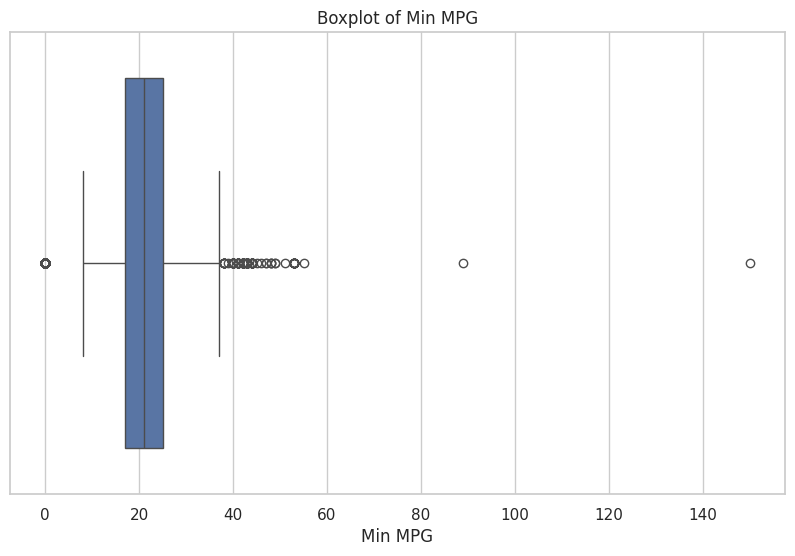

In [ ]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure for the boxplot
plt.figure(figsize=(10, 6))

# Create a boxplot for Min MPG
sns.boxplot(data=car, x='Min MPG')

# Set the title and labels
plt.title('Boxplot of Min MPG')
plt.xlabel('Min MPG')

# Display the plot
plt.show()



In [ ]:
# Calculate the median for 'Min MPG'
min_mpg_median = car['Min MPG'].median()
min_mpg_median


21.0

In [ ]:
# Fill missing values with median
car['Min MPG'].fillna(min_mpg_median, inplace=True)

In [ ]:
# Verify that there are no missing values left in 'Min MPG'
print(car['Min MPG'].isnull().sum())

0


**Intepret:**The median is the most appropriate choice to replace the missing values because it will not be skewed by the extreme values. the data will in a way that maintains the central tendency of the data without being influenced by outliers.

#### 6. Max MPG Column
by: NUR ATIEKA RAFIEKAH BINTI RAZAK (SD22003)

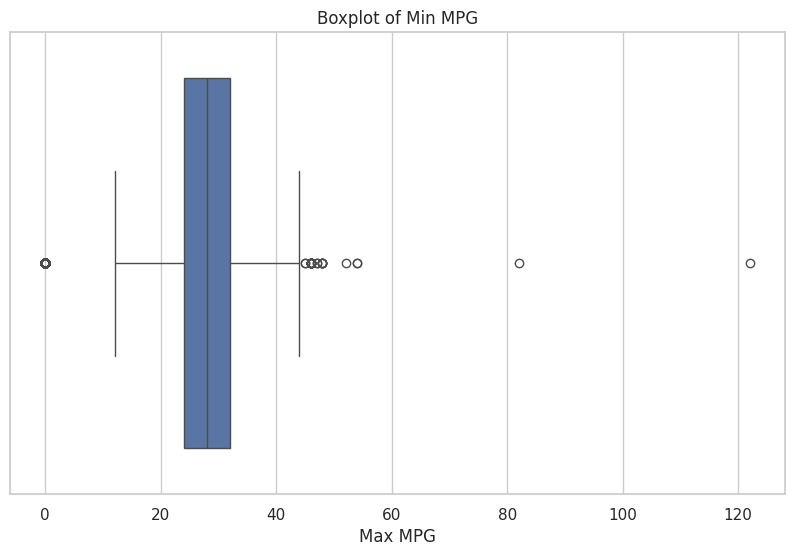

In [ ]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure for the boxplot
plt.figure(figsize=(10, 6))

# Create a boxplot for Max MPG
sns.boxplot(data=car, x='Max MPG')

# Set the title and labels
plt.title('Boxplot of Min MPG')
plt.xlabel('Max MPG')

# Display the plot
plt.show()

In [ ]:
# Calculate the median for 'Max MPG'
max_mpg_median = car['Max MPG'].median()
max_mpg_median

28.0

In [ ]:
# Fill missing values with median for 'Max MPG'
car['Max MPG'].fillna(max_mpg_median, inplace=True)

In [ ]:
# Verify that there are no missing values left in 'Max MPG'
print(car['Max MPG'].isnull().sum())

0


**Intepret:**The median is the most appropriate choice to replace the missing values because it will not be skewed by the extreme values. the data will in a way that maintains the central tendency of the data without being influenced by outliers.

#### 7. Fuel Type Column
by: NUR A’RIFAH AKMAL BINTI HUSSIN (SD22032)

**Gasoline:** A common fuel derived from petroleum. It is widely used in internal combustion engines.

**E85 Flex Fuel:** A blend of 85% ethanol and 15% gasoline. Flex-fuel vehicles are designed to run on gasoline, E85, or any mixture of the two.

**Hybrid:** Vehicles that use both a gasoline engine and an electric motor. The electric motor assists the gasoline engine to improve fuel efficiency and reduce emissions.

**Diesel:** A type of fuel derived from petroleum but is heavier and oilier than gasoline. Diesel engines are often more fuel-efficient than gasoline engines and are commonly used in trucks and heavy machinery.

**Plug-In Hybrid:** Similar to hybrid vehicles but can be recharged by plugging into an external power source. They can run on electric power alone for a certain distance before switching to the gasoline engine.

**Gas/Electric Hyb (Gas/Electric Hybrid):** Another term for hybrid vehicles, emphasizing the use of both gasoline and electric power.

**Flexible Fuel:** Vehicles that can run on more than one type of fuel, typically a mixture of gasoline and ethanol (like E85). Flex-fuel vehicles are equipped with sensors to detect the fuel mixture and adjust engine performance accordingly.

**Summary of Differences**

**Gasoline:** Traditional petroleum-based fuel.

**E85 Flex Fuel:** Ethanol blend (85% ethanol, 15% gasoline) used in flex-fuel vehicles.

**Hybrid:** Combination of gasoline engine and electric motor.

**Diesel:** Petroleum-based fuel used in more fuel-efficient engines, often in trucks.

**Plug-In Hybrid:** Hybrid with the ability to recharge via an external power source.

**Gas/Electric Hyb:** Another term for hybrid vehicles.

**Flexible Fuel:** Vehicles capable of running on a mixture of fuels, typically gasoline and ethanol.

In [ ]:
unique_fueltype = car['Fuel type'].unique()
unique_fueltype

array(['Gasoline ', 'Hybrid ', 'Diesel ', nan, '– ', 'E85 Flex Fuel ',
       'Plug-In Hybrid ', 'Gas/Electric Hyb ', 'Flexible Fuel '],
      dtype=object)

In [ ]:
car['Fuel type'].replace('-', 'others', inplace=True)


In [ ]:
car['Fuel type'].fillna('others', inplace=True)

In [ ]:
# Verify that there are no missing values left in 'Fuel type'
print(car['Fuel type'].isnull().sum())

0


**Intepret:**
unique() is used to extract all unique values from Fuel type. Any occurrence of the '-' value in the 'Fuel type' column is replaced with the string 'others'.
The inplace=True parameter ensures that the replacement is made directly in the original DataFrame without needing to reassign it. fillna() fills any missing (NaN) values in the 'Fuel type' column with the string 'others'. isnull().sum() counts the number of missing values (NaNs) in the column. If everything has been correctly filled, the result should be 0.

####  8. Accidents or Damage
by: NUR ATIEKA RAFIEKAH BINTI RAZAK (SD22003)

In [ ]:
car['Accidents or damage'].isnull().sum()


3616

In [ ]:
# Fill missing values with 0
car['Accidents or damage'].fillna(0, inplace=True)


In [ ]:
# Verify that there are no missing values left in 'Accidents or damage'
print(car['Accidents or damage'].isnull().sum())

0


**Intepret:**We chose to replace the null values with 0 because  they represent where no accidents or damage occurred.  Given that the 'Accidents or damage' column pertains to the condition of new vehicles, it makes sense filling missing values with 0 indicate new cars typically have no reported accidents or damage

#### 9. Open Recall Column
by: NURUL FAQIHAH BINTI MAZLI AMRAN (SD22047)

In [ ]:
car = car.drop(columns=['Open recall'])
print("\nDropped 'Open recall' column.")


Dropped 'Open recall' column.


In [ ]:
# Display the cleaned dataset
print("\nCleaned dataset:")
car.head()


Cleaned dataset:


,Make,Year,Condition,Mileage,Price,Seller Rating,Seller Rating Count,Interior color,Drivetrain,Min MPG,...,Accidents or damage,1-owner vehicle,Personal use only,Clean title,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
4867,Jeep,2024,New,90.0,55791.0,4.2,1632.0,Global Black,4WD,0.0,...,0.0,others,Not Relate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4251,Jeep,2024,New,4.0,71224.0,4.4,1991.0,Tupelo,4WD,18.0,...,0.0,others,Not Relate,NaN,5.0,5.0,5.0,5.0,5.0,5.0
2172,Jeep,2024,New,10.0,32992.0,4.8,3218.0,Black,4WD,24.0,...,0.0,others,Not Relate,NaN,5.0,5.0,5.0,5.0,5.0,5.0
3159,Jeep,2023,New,30.0,48509.0,4.3,875.0,Black,4WD,16.0,...,0.0,others,Not Relate,NaN,5.0,5.0,5.0,5.0,5.0,5.0
4491,Jeep,2024,New,0.0,52118.0,4.3,741.0,Global Black,4WD,18.0,...,0.0,others,Not Relate,NaN,5.0,5.0,5.0,5.0,5.0,5.0


**Interpretation :**
The 'Open recall' column is not needed for interpretation or further analysis, so it is removed to clean up the dataset. So,  the dataset no longer contains the 'Open recall' column.

#### 10. Clean title,Comfort_score, Interior_score, Performance_score, Value_score, Exterior_score and Reliability_score Columns

by: NURUL FAQIHAH BINTI MAZLI AMRAN (SD22047)

In [ ]:
num_rows = car.shape[0]
num_nulls = car['Clean title'].isnull().sum()

print(f"\nNumber of rows: {num_rows}")
print(f"Number of null values in 'clean title': {num_nulls}")


Number of rows: 9016
Number of null values in 'clean title': 7685


In [ ]:
# Drop the 'Clean title' column if more than half of the values are null
if num_nulls > (num_rows / 2):
    car = car.drop(columns=['Clean title'])
    print("\n'Dropped 'Clean title' column due to excessive null values.")
else:
    # Fill missing values if the column is not dropped
    car['clean title'] = car['clean title'].fillna('Default Value')  # Replace 'Default Value' with appropriate value
    print("\nFilled missing values in 'clean title' column.")


'Dropped 'Clean title' column due to excessive null values.


In [ ]:
num_nulls = car['Comfort_score'].isnull().sum()

# Drop the 'Comfort_score' column if more than half of the values are null
if num_nulls > (num_rows / 2):
    car = car.drop(columns=['Comfort_score'])
    print("\n'Dropped 'Comfort_score' column due to excessive null values.")
else:
    # Fill missing values if the column is not dropped
    car['Comfort_score'] = car['Comfort_score'].fillna('Default Value')  # Replace 'Default Value' with appropriate value
    print("\nFilled missing values in 'Comfort_score' column.")


'Dropped 'Comfort_score' column due to excessive null values.


In [ ]:
num_nulls = car['Interior_score'].isnull().sum()
# Drop the 'Interior_score' column if more than half of the values are null
if num_nulls > (num_rows / 2):
    car = car.drop(columns=['Interior_score'])
    print("\n'Dropped 'Interior_score' column due to excessive null values.")
else:
    # Fill missing values if the column is not dropped
    car['Interior_score'] = car['Interior_score'].fillna('Default Value')  # Replace 'Default Value' with appropriate value
    print("\nFilled missing values in 'Interior_score' column.")


'Dropped 'Interior_score' column due to excessive null values.


In [ ]:
num_nulls = car['Performance_score'].isnull().sum()
# Drop the 'Performance_score' column if more than half of the values are null
if num_nulls > (num_rows / 2):
    car = car.drop(columns=['Performance_score'])
    print("\n'Dropped 'Performance_score' column due to excessive null values.")
else:
    # Fill missing values if the column is not dropped
    car['Performance_score'] = car['Performance_score'].fillna('Default Value')  # Replace 'Default Value' with appropriate value
    print("\nFilled missing values in 'Performance_score' column.")


'Dropped 'Performance_score' column due to excessive null values.


In [ ]:
num_nulls = car['Value_score'].isnull().sum()
# Drop the 'Value_score ' column if more than half of the values are null
if num_nulls > (num_rows / 2):
    car = car.drop(columns=['Value_score'])
    print("\n'Dropped 'Value_score' column due to excessive null values.")
else:
    # Fill missing values if the column is not dropped
    car['Value_score'] = car['Value_score'].fillna('Default Value')  # Replace 'Default Value' with appropriate value
    print("\nFilled missing values in 'Value_score ' column.")


'Dropped 'Value_score' column due to excessive null values.


In [ ]:
num_nulls = car['Exterior_score'].isnull().sum()
# Drop the 'Exterior_score ' column if more than half of the values are null
if num_nulls > (num_rows / 2):
    car = car.drop(columns=['Exterior_score'])
    print("\n'Dropped 'Exterior_score  ' column due to excessive null values.")
else:
    # Fill missing values if the column is not dropped
    car['Exterior_score'] = car['Exterior_score'].fillna('Default Value')  # Replace 'Default Value' with appropriate value
    print("\nFilled missing values in 'Exterior_score' column.")


'Dropped 'Exterior_score  ' column due to excessive null values.


In [ ]:
num_nulls = car['Reliability_score'].isnull().sum()
# Drop the 'Reliability_score  ' column if more than half of the values are null
if num_nulls > (num_rows / 2):
    car = car.drop(columns=['Reliability_score'])
    print("\n'Dropped 'Reliability_score   ' column due to excessive null values.")
else:
    # Fill missing values if the column is not dropped
    car['Reliability_score'] = car['Reliability_score'].fillna('Default Value')  # Replace 'Default Value' with appropriate value
    print("\nFilled missing values in 'Reliability_score' column.")


'Dropped 'Reliability_score   ' column due to excessive null values.


In [ ]:
# Display the cleaned dataset
print("\nCleaned dataset:")
car.head()


Cleaned dataset:


,Make,Year,Condition,Mileage,Price,Seller Rating,Seller Rating Count,Interior color,Drivetrain,Min MPG,Max MPG,Fuel type,Engine Size (L),Accidents or damage,1-owner vehicle,Personal use only
4867,Jeep,2024,New,90.0,55791.0,4.2,1632.0,Global Black,4WD,0.0,0.0,Gasoline,2.0,0.0,others,Not Relate
4251,Jeep,2024,New,4.0,71224.0,4.4,1991.0,Tupelo,4WD,18.0,25.0,Gasoline,5.7,0.0,others,Not Relate
2172,Jeep,2024,New,10.0,32992.0,4.8,3218.0,Black,4WD,24.0,32.0,Gasoline,2.0,0.0,others,Not Relate
3159,Jeep,2023,New,30.0,48509.0,4.3,875.0,Black,4WD,16.0,23.0,Gasoline,3.6,0.0,others,Not Relate
4491,Jeep,2024,New,0.0,52118.0,4.3,741.0,Global Black,4WD,18.0,25.0,Gasoline,3.6,0.0,others,Not Relate


**Interpretation :** Columns with more than 50% missing data are often dropped because the remaining data may not be reliable for analysis. Otherwise, missing values are filled to maintain the integrity of the column.The final dataset is cleaner and more manageable, with unnecessary columns removed and missing values handled, making it ready for further analysis or modeling.

# **CHECKING FOR MISSING VALUES**

In [ ]:
# Checking for missing values in each column
print(car.isnull().sum())

Make                   0
Year                   0
Condition              0
Mileage                0
Price                  0
Seller Rating          0
Seller Rating Count    0
Interior color         0
Drivetrain             0
Min MPG                0
Max MPG                0
Fuel type              0
Engine Size (L)        0
Accidents or damage    0
1-owner vehicle        0
Personal use only      0
dtype: int64


# **HANDLE OUTLIER**

1. Select data where make between year 2014-2024. bcs only relevent car

In [ ]:
# Filter data where year is between 2014 and 2024
car= car[(car['Year'] >= 2014) & (car['Year'] < 2024)]
car.head()

,Make,Year,Condition,Mileage,Price,Seller Rating,Seller Rating Count,Interior color,Drivetrain,Min MPG,Max MPG,Fuel type,Engine Size (L),Accidents or damage,1-owner vehicle,Personal use only
3159,Jeep,2023,New,30.0,48509.0,4.3,875.0,Black,4WD,16.0,23.0,Gasoline,3.6,0.0,others,Not Relate
2582,Jeep,2022,New,777.0,57000.0,4.0,54.0,Steel Gray,4WD,21.0,28.0,Hybrid,2.0,0.0,others,Not Relate
8429,Jeep,2023,New,55.0,56423.0,4.0,54.0,Global Black,4WD,21.0,28.0,Hybrid,2.0,0.0,others,Not Relate
3577,Jeep,2023,New,5808.0,25667.0,4.4,1991.0,Black,4WD,24.0,32.0,Gasoline,2.0,0.0,others,Not Relate
199,Jeep,2023,New,0.0,53659.0,4.3,741.0,Black,4WD,17.0,22.0,Gasoline,3.6,0.0,others,Not Relate


2. show outlier

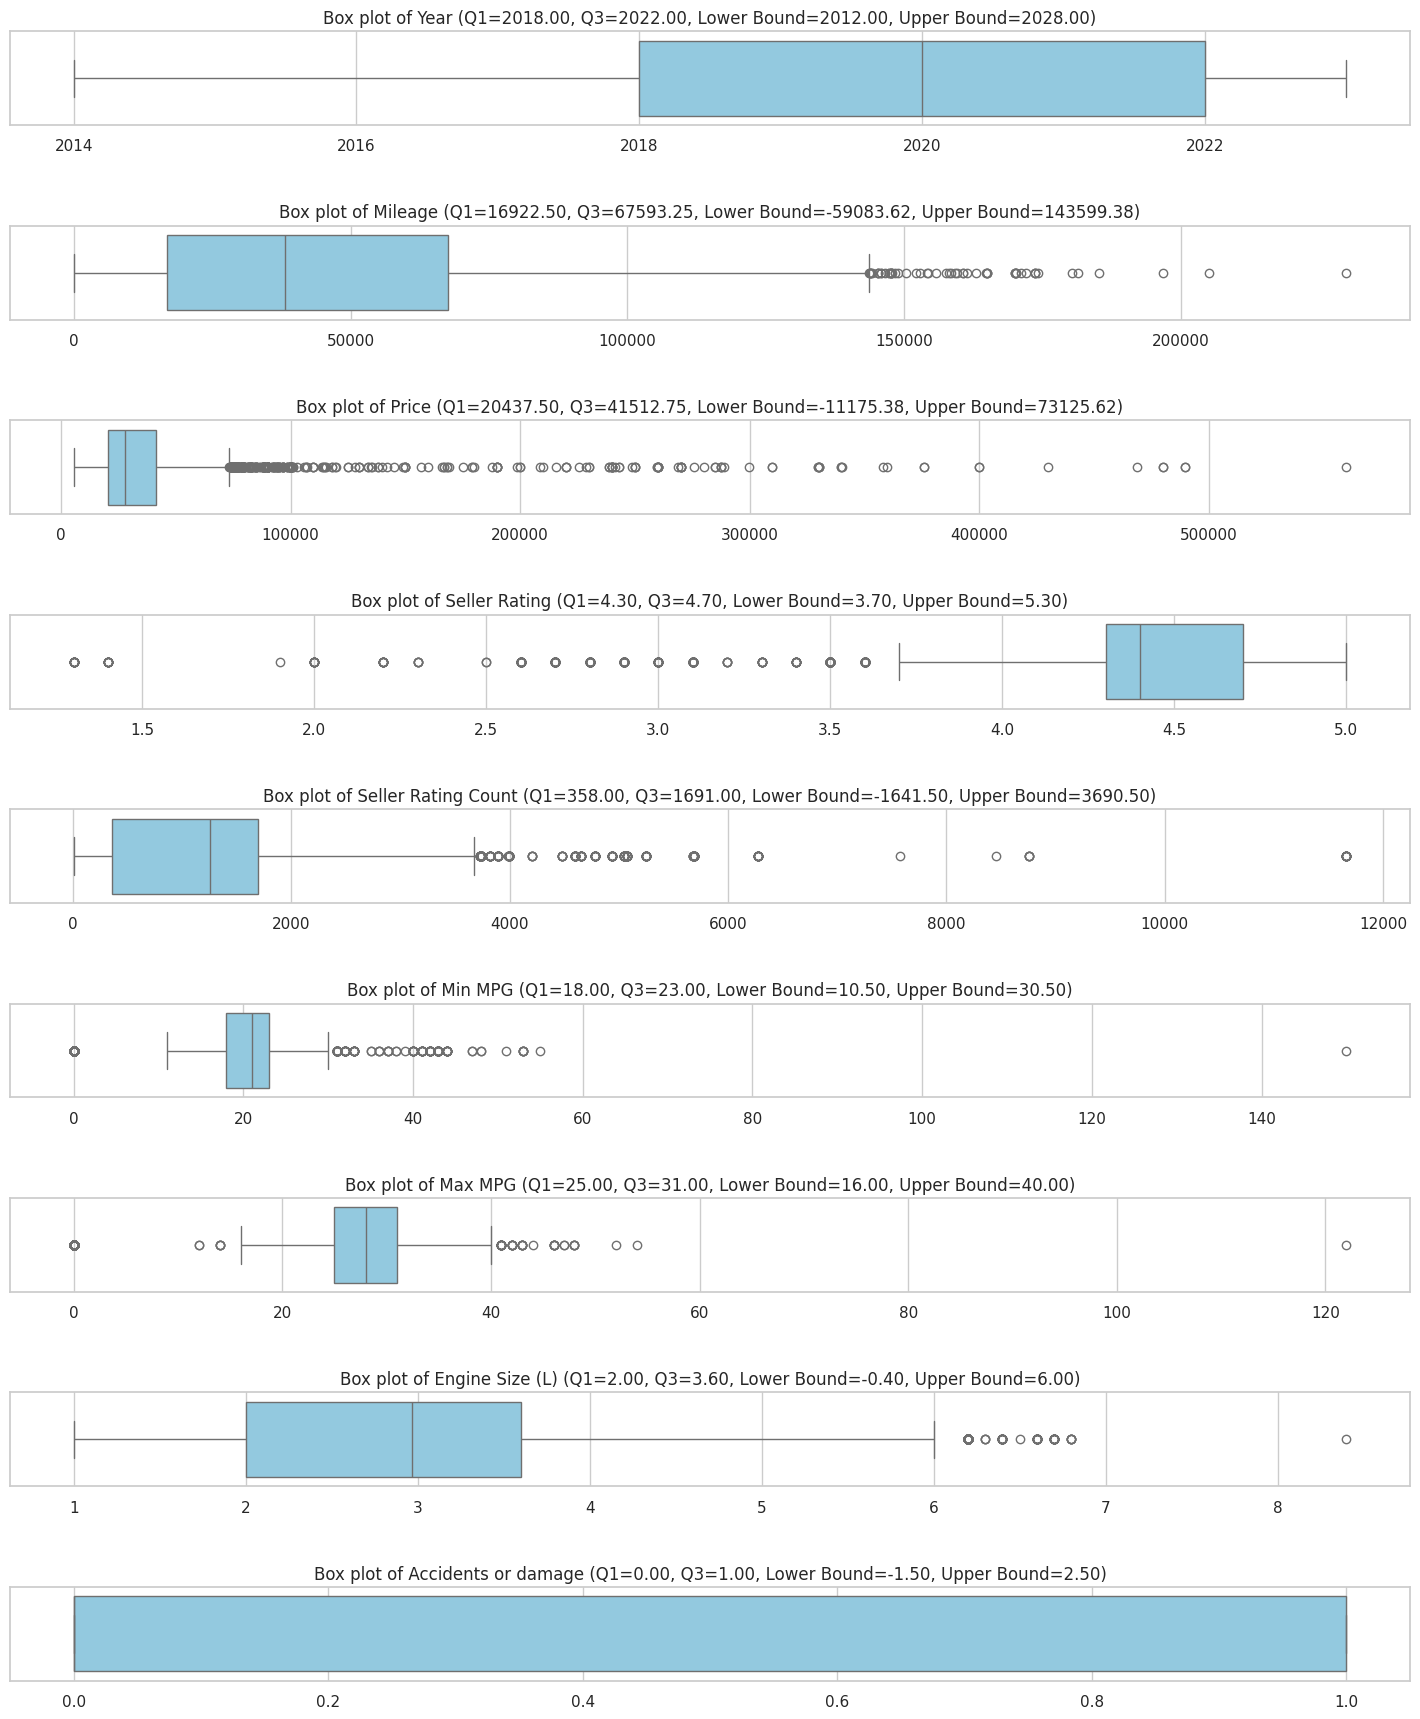

{'Year': 0,
 'Mileage': 57,
 'Price': 308,
 'Seller Rating': 392,
 'Seller Rating Count': 320,
 'Min MPG': 297,
 'Max MPG': 220,
 'Engine Size (L)': 182,
 'Accidents or damage': 0}

In [ ]:
# Select numerical columns
numerical_columns = car.select_dtypes(include=[np.number]).columns

# Function to detect outliers using IQR
def detect_outliers_iqr(car, column):
    Q1 = car[column].quantile(0.25)
    Q3 = car[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = car[(car[column] < lower_bound) | (car[column] > upper_bound)]
    return outliers, Q1, Q3, lower_bound, upper_bound  # Return Q1, Q3, lower bound, and upper bound along with outliers

# Dictionary to store outliers for each column
outliers_dict = {col: detect_outliers_iqr(car, col) for col in numerical_columns}

# Visualize outliers using box plots
plt.figure(figsize=(15, 2 * len(numerical_columns)))  # Adjust height based on number of plots
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    outliers, Q1, Q3, lower_bound, upper_bound = outliers_dict[col]
    sns.boxplot(x=car[col], color='skyblue')
    plt.title(f'Box plot of {col} (Q1={Q1:.2f}, Q3={Q3:.2f}, Lower Bound={lower_bound:.2f}, Upper Bound={upper_bound:.2f})', fontsize=12)
    plt.xlabel('')
    plt.tight_layout(pad=3.0)

plt.show()

# Display the count of outliers for each numerical column
outliers_count = {col: len(outliers_dict[col][0]) for col in numerical_columns}
outliers_count


3. remove outlier seller rating <3.70

In [ ]:
# Function to remove outliers using IQR
def remove_outliers_iqr(car, column):
    Q1 = car[column].quantile(0.25)
    Q3 = car[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    car= car[(car[column] >= lower_bound) & (car[column] <= upper_bound)]
    return car

# Remove outliers for the "Seller Rating" column
car= remove_outliers_iqr(car, 'Seller Rating')

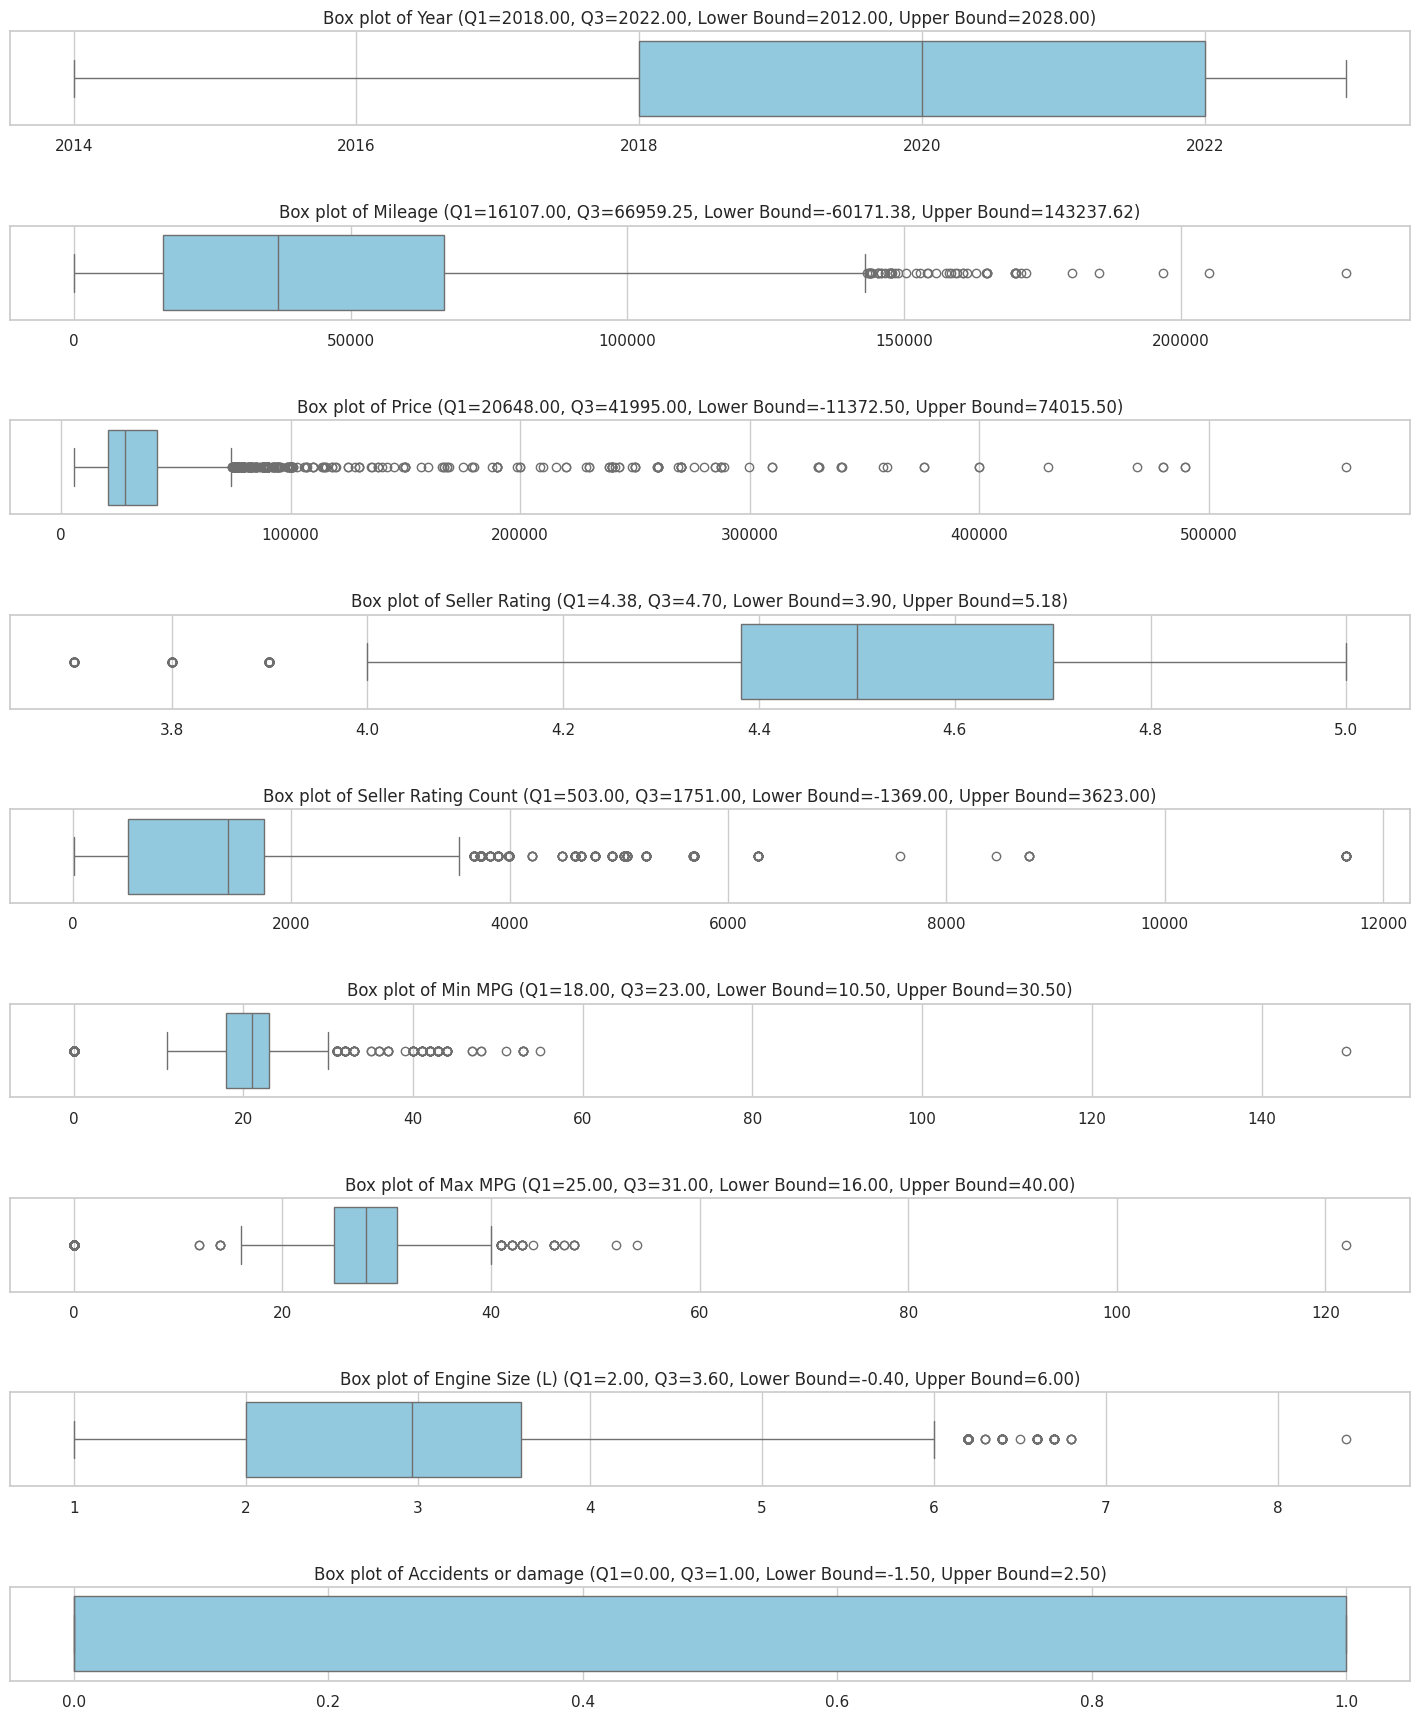

{'Year': 0,
 'Mileage': 54,
 'Price': 277,
 'Seller Rating': 120,
 'Seller Rating Count': 347,
 'Min MPG': 256,
 'Max MPG': 187,
 'Engine Size (L)': 176,
 'Accidents or damage': 0}

In [ ]:
# Select numerical columns
numerical_columns = car.select_dtypes(include=[np.number]).columns

# Function to detect outliers using IQR
def detect_outliers_iqr(car, column):
    Q1 = car[column].quantile(0.25)
    Q3 = car[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = car[(car[column] < lower_bound) | (car[column] > upper_bound)]
    return outliers, Q1, Q3, lower_bound, upper_bound  # Return Q1, Q3, lower bound, and upper bound along with outliers

# Dictionary to store outliers for each column
outliers_dict = {col: detect_outliers_iqr(car, col) for col in numerical_columns}

# Visualize outliers using box plots
plt.figure(figsize=(15, 2 * len(numerical_columns)))  # Adjust height based on number of plots
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    outliers, Q1, Q3, lower_bound, upper_bound = outliers_dict[col]
    sns.boxplot(x=car[col], color='skyblue')
    plt.title(f'Box plot of {col} (Q1={Q1:.2f}, Q3={Q3:.2f}, Lower Bound={lower_bound:.2f}, Upper Bound={upper_bound:.2f})', fontsize=12)
    plt.xlabel('')
    plt.tight_layout(pad=3.0)

plt.show()

# Display the count of outliers for each numerical column
outliers_count = {col: len(outliers_dict[col][0]) for col in numerical_columns}
outliers_count


In [ ]:
print(car)

           Make  Year  Condition  Mileage    Price  Seller Rating  \
3159       Jeep  2023        New     30.0  48509.0            4.3   
2582       Jeep  2022        New    777.0  57000.0            4.0   
8429       Jeep  2023        New     55.0  56423.0            4.0   
3577       Jeep  2023        New   5808.0  25667.0            4.4   
199        Jeep  2023        New      0.0  53659.0            4.3   
...         ...   ...        ...      ...      ...            ...   
2055     Nissan  2023  Certified   1205.0  29000.0            4.5   
1325      Dodge  2021  Certified  43984.0  42494.0            4.9   
3750  Chevrolet  2021  Certified  26728.0  23998.0            4.9   
1310      Honda  2023  Certified   8070.0  45997.0            3.8   
8158       Ford  2020  Certified  34594.0  22995.0            4.2   

      Seller Rating Count    Interior color Drivetrain  Min MPG  Max MPG  \
3159                875.0            Black         4WD     16.0     23.0   
2582               

# **EXPORT CLEAN DATA TO A CSV FILE**

In [ ]:
output_file = 'car_data.csv'
car.to_csv(output_file, index=False)


**4. DATA PREVIEW**


In [ ]:
#Load the data
car_clean= pd.read_csv("/content/car_data.csv")

In [ ]:
car_clean.head()

,Make,Year,Condition,Mileage,Price,Seller Rating,Seller Rating Count,Interior color,Drivetrain,Min MPG,Max MPG,Fuel type,Engine Size (L),Accidents or damage,1-owner vehicle,Personal use only
0,Jeep,2023,New,30.0,48509.0,4.3,875.0,Black,4WD,16.0,23.0,Gasoline,3.6,0.0,others,Not Relate
1,Jeep,2022,New,777.0,57000.0,4.0,54.0,Steel Gray,4WD,21.0,28.0,Hybrid,2.0,0.0,others,Not Relate
2,Jeep,2023,New,55.0,56423.0,4.0,54.0,Global Black,4WD,21.0,28.0,Hybrid,2.0,0.0,others,Not Relate
3,Jeep,2023,New,5808.0,25667.0,4.4,1991.0,Black,4WD,24.0,32.0,Gasoline,2.0,0.0,others,Not Relate
4,Jeep,2023,New,0.0,53659.0,4.3,741.0,Black,4WD,17.0,22.0,Gasoline,3.6,0.0,others,Not Relate


In [ ]:
# Checking the number of rows and columns
car_clean.shape

(4152, 16)

In [ ]:
#Column Names and Types
car_clean.columns

Index(['Make', 'Year', 'Condition', 'Mileage', 'Price', 'Seller Rating',
       'Seller Rating Count', 'Interior color', 'Drivetrain', 'Min MPG',
       'Max MPG', 'Fuel type', 'Engine Size (L)', 'Accidents or damage',
       '1-owner vehicle', 'Personal use only'],
      dtype='object')

In [ ]:
# Checking the data types of each column
car_clean.dtypes

Make                    object
Year                     int64
Condition               object
Mileage                float64
Price                  float64
Seller Rating          float64
Seller Rating Count    float64
Interior color          object
Drivetrain              object
Min MPG                float64
Max MPG                float64
Fuel type               object
Engine Size (L)        float64
Accidents or damage    float64
1-owner vehicle         object
Personal use only       object
dtype: object

In [ ]:
# Getting more information about the DataFrame
car_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4152 entries, 0 to 4151
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 4152 non-null   object 
 1   Year                 4152 non-null   int64  
 2   Condition            4152 non-null   object 
 3   Mileage              4152 non-null   float64
 4   Price                4152 non-null   float64
 5   Seller Rating        4152 non-null   float64
 6   Seller Rating Count  4152 non-null   float64
 7   Interior color       4152 non-null   object 
 8   Drivetrain           4152 non-null   object 
 9   Min MPG              4152 non-null   float64
 10  Max MPG              4152 non-null   float64
 11  Fuel type            4152 non-null   object 
 12  Engine Size (L)      4152 non-null   float64
 13  Accidents or damage  4152 non-null   float64
 14  1-owner vehicle      4152 non-null   object 
 15  Personal use only    4152 non-null   o

In [ ]:
#quick summary
car_clean.describe()

,Year,Mileage,Price,Seller Rating,Seller Rating Count,Min MPG,Max MPG,Engine Size (L),Accidents or damage
count,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000
mean,2019.712187,44421.706407,38452.252168,4.511163,1479.522078,20.651252,27.035645,2.955333,0.280106
std,2.661731,35818.701027,41177.942165,0.269794,1389.326547,6.432179,7.142335,1.228098,0.449105
min,2014.000000,0.000000,5495.000000,3.700000,6.000000,0.000000,0.000000,1.000000,0.000000
25%,2018.000000,16107.000000,20648.000000,4.381504,503.000000,18.000000,25.000000,2.000000,0.000000
50%,2020.000000,36850.500000,27995.000000,4.500000,1420.000000,21.000000,28.000000,2.964659,0.000000
75%,2022.000000,66959.250000,41995.000000,4.700000,1751.000000,23.000000,31.000000,3.600000,1.000000
max,2023.000000,229835.000000,559880.000000,5.000000,11663.000000,150.000000,122.000000,8.400000,1.000000


In [ ]:
# Checking for missing values in each column
car_clean.isnull().sum()

Make                   0
Year                   0
Condition              0
Mileage                0
Price                  0
Seller Rating          0
Seller Rating Count    0
Interior color         0
Drivetrain             0
Min MPG                0
Max MPG                0
Fuel type              0
Engine Size (L)        0
Accidents or damage    0
1-owner vehicle        0
Personal use only      0
dtype: int64

In [ ]:
#Count the Unique Values
car_clean.nunique()

Make                     44
Year                     10
Condition                 3
Mileage                2776
Price                  2087
Seller Rating            15
Seller Rating Count     264
Interior color          379
Drivetrain                5
Min MPG                  39
Max MPG                  38
Fuel type                 9
Engine Size (L)          48
Accidents or damage       2
1-owner vehicle           3
Personal use only         3
dtype: int64

**5. DATA DESCRIPTION**

**6. DATA VISUALIZATION**

1. Relationship between the Maximum Miles per Gallon (MPG) by Drivetrain Type

In [ ]:
import pandas as pd
import plotly.express as px

# Read the data from CSV file
data = pd.read_csv("/content/car_data.csv")

# Define the drivetrain categories
drivetrain_categories = ['FWD', 'RWD', 'AWD', '4WD']

# Create an interactive box plot
fig = px.box(data, x="Drivetrain", y="Max MPG", color="Drivetrain",
             category_orders={"Drivetrain": drivetrain_categories},
             title="Maximum Miles per Gallon (MPG) by Drivetrain Type",
             hover_data=["Make", "Year", "Fuel type"])


# Customize the layout
fig.update_layout(
    xaxis_title="Drivetrain Type",
    yaxis_title="Maximum MPG",
    legend_title="Drivetrain",
    font=dict(family="Arial", size=16),
    margin=dict(l=60, r=20, t=60, b=60)
)

# Display the interactive plot
fig.show()

Based on Figure 2, the boxplot graph shows the maximum miles per gallon (MPG) by drivetrain type. We have five types of drivetrains which are  Front-Wheel Drive(FWD), Rear-Wheel Drive(RWD), All-Wheel Drive (AWD), Four-Wheel Drive(4WD) and others. The boxplot represents the interquartile range of the maximum MPG value for each drivetrain type.

Front-wheel drive (FWD) cars generally have the highest maximum MPG in this dataset. The IQR for FWD cars is entirely above the IQRs for the other drivetrain types, and the median MPG for FWD cars is also the highest. This suggests that FWD cars tend to be more fuel-efficient than cars with other drivetrain types. Compared to All-wheel drive (AWD) cars that have the lowest maximum MPG.The IQR for AWD cars is the lowest, and the median MPG for AWD cars is also the lowest. This suggests that AWD cars tend to be less fuel-efficient than cars with other drivetrain types


**Scattered Plot : Minimum and Maximum MPG by Engine size by Brand**

In [ ]:
!pip install plotly

In [ ]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets

# Load your dataset into a pandas DataFrame
df = pd.read_csv('car_data.csv')

# Get unique brands for dropdown options
brands = df['Make'].unique()

# Function to update the plot based on the selected brand
def update_plot(brand):
    # Filter the DataFrame based on the selected brand
    filtered_df = df[df['Make'] == brand]

    # Create a scatter plot for min and max MPG
    fig = px.scatter(filtered_df, x='Engine Size (L)', y=['Min MPG', 'Max MPG'],
                     title=f'Minimum and Maximum MPG by Engine Size for {brand}',
                     labels={'Engine Size (L)': 'Engine Size (L)', 'value': 'MPG', 'variable': 'MPG Type'},
                     color_discrete_map={'Min MPG': 'blue', 'Max MPG': 'hotpink'})
    fig.update_layout(yaxis_title='MPG', xaxis_title='Engine Size (L)')
    fig.show()

# Create a dropdown menu to select the brand
dropdown = widgets.Dropdown(options=brands, description='Select Brand')

# Define a function to update the plot when the dropdown selection changes
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        update_plot(change['new'])

# Link the dropdown menu to the function that updates the plot
dropdown.observe(on_change)

# Display the initial plot
update_plot(brands[0])
dropdown


Dropdown(description='Select Brand', options=('Jeep', 'Kia', 'Lexus', 'Ford', 'Genesis', 'GMC', 'INFINITI', 'H…

The scatter plot graph of engine size against maximum and minimum miles per gallon (MPG) reveals a clear inverse relationship between engine size and fuel efficiency. As the engine size increases, both maximum and minimum MPG values tend to decrease. This indicates that larger engines, while generally more powerful, are less fuel-efficient compared to smaller engines.The mpg here divided by two which is min mpg and max mpg .Which min mpg is for city drive and max mpg is more to highway drive.
Generally, there is an inverse relationship between engine size and MPG. Larger engines tend to have lower MPG (both maximum and minimum) because they require more fuel to generate power. Conversely, smaller engines tend to have higher MPG due to their fuel efficiency. so for longer drive we would suggest a moderate engine size which 2.0L to 3.0L.
For long-distance driving, the graph underscores the advantage of selecting vehicles with smaller to moderate engine sizes, as they offer superior fuel efficiency. This can lead to significant cost savings on fuel and reduce environmental impact. Additionally, understanding the trend helps in making informed decisions based on driving needs and priorities. Advanced technologies that improve fuel efficiency in larger engines can also be considered for those requiring higher power output without severely sacrificing fuel economy.

**HORIZONTAL BAR CHART**

In [ ]:
car_makes = df['Make'].unique().tolist()

def plot_price_vs_fuel_type(car_make, price_type):
    filtered_df = df[df['Make'] == car_make]

    if price_type == 'Average':
        price_df = filtered_df.groupby('Fuel type')['Price'].mean().reset_index()
    elif price_type == 'Maximum':
        price_df = filtered_df.groupby('Fuel type')['Price'].max().reset_index()
    elif price_type == 'Minimum':
        price_df = filtered_df.groupby('Fuel type')['Price'].min().reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Price', y='Fuel type', data=price_df, palette='viridis')
    plt.title(f'{price_type} Price of {car_make} Cars by Fuel Type')
    plt.xlabel(f'{price_type} Price (in USD)')
    plt.ylabel('Fuel Type')
    plt.grid(True)
    plt.show()

car_make_dropdown = widgets.Dropdown(options=car_makes, description='Car Make:')
price_type_dropdown = widgets.Dropdown(options=['Average', 'Maximum', 'Minimum'], description='Price Type:')

interact(plot_price_vs_fuel_type, car_make=car_make_dropdown, price_type=price_type_dropdown)



interactive(children=(Dropdown(description='Car Make:', options=('Jeep', 'Kia', 'Lexus', 'Ford', 'Genesis', 'G…

<function __main__.plot_price_vs_fuel_type(car_make, price_type)>

3. Line Chart: Average Price Trend Over Production Years by Car Make

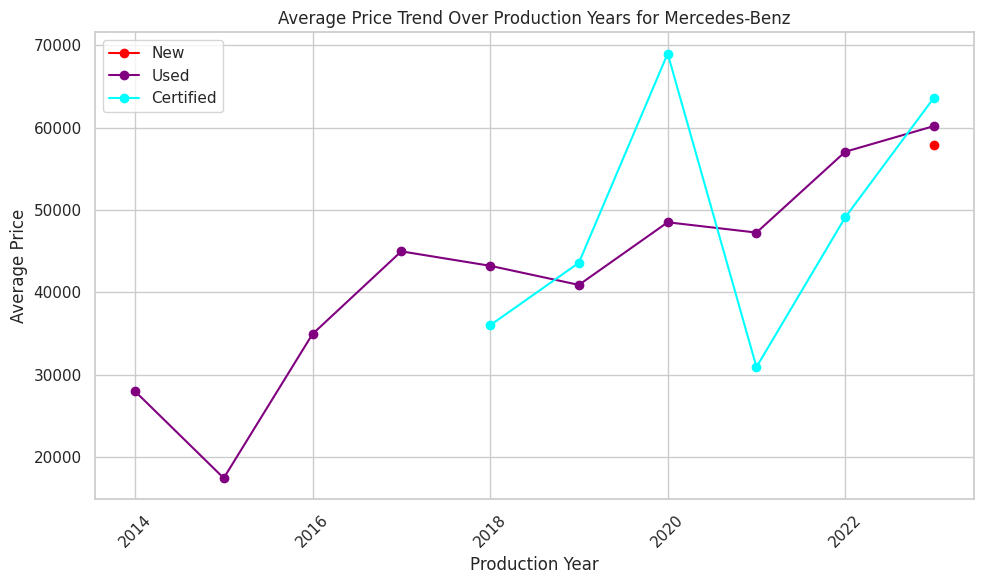

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Load your dataset into a pandas DataFrame
# Assuming your dataset is named 'car_data.csv'
df = pd.read_csv('car_data.csv')

# Convert the 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Function to update the plot based on the selected car make
def update_plot(car_make):
    # Filter the DataFrame based on the selected car make
    filtered_df = df[df['Make'] == car_make]

    # Group the filtered data by production year and condition, and calculate the average price
    avg_price_by_year = filtered_df.groupby(['Year', 'Condition'])['Price'].mean().unstack()

    # Plot the line plot
    plt.figure(figsize=(10, 6))

    # Plotting new cars if 'New' exists in the DataFrame
    if 'New' in avg_price_by_year:
        plt.plot(avg_price_by_year['New'], marker='o', label='New', color='red')

    # Plotting used cars if 'Used' exists in the DataFrame
    if 'Used' in avg_price_by_year:
        plt.plot(avg_price_by_year['Used'], marker='o', label='Used', color='purple')

    # Plotting certified cars if 'Certified' exists in the DataFrame
    if 'Certified' in avg_price_by_year:
        plt.plot(avg_price_by_year['Certified'], marker='o', label='Certified', color='cyan')

    plt.title(f'Average Price Trend Over Production Years for {car_make}')
    plt.xlabel('Production Year')
    plt.ylabel('Average Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Show plot
    plt.show()

# Get unique car makes for dropdown options
car_makes = df['Make'].unique()

# Create dropdown widget
make_dropdown = widgets.Dropdown(options=car_makes, description='Car Make:')

# Interact function to update plot based on dropdown selection
interact(update_plot, car_make=make_dropdown);


Interpretation : The graph provides average price trends over production years for various car makes and conditions, such as New and Used, or Certified, and points out key patterns in consumer preferences. Mercedes-Benz constantly has higher average prices, reflecting the premium image of the brand, while Toyota has constant or increasing prices, a direct reflection of strong demand and brand loyalty. Such insights are valuable to price dynamics and, in turn, help businesses in developing strategies that pertain to pricing, inventory management, and market positioning. These insights are critical to AutoHub's sales and marketing teams in understanding their competitive standing and customer preferences, thus making the right decisions for customer satisfaction and business growth. The data visualization very directly supports the objectives of the assignment by giving insights that can lead to making adjustments to be more effective in sales.

**BAR CHART: DISTRIBUTION OF CAR CONDITION FOR SELECTED CAR MAKE**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Load your dataset into a pandas DataFrame
# Assuming your dataset is named 'car_data.csv'
df = pd.read_csv('car_data.csv')

# Function to update the plot based on the selected car make
def update_plot(car_make):
    # Filter the DataFrame based on the selected car make
    filtered_df = df[df['Make'] == car_make]

    # Plot the distribution of car conditions with different colors
    plt.figure(figsize=(8, 6))
    condition_colors = {'New': 'green', 'Used': 'red', 'Certified': 'blue'}
    filtered_df['Condition'].value_counts().plot(kind='bar', color=[condition_colors.get(cond, 'gray') for cond in filtered_df['Condition'].unique()])
    plt.title(f'Distribution of Car Conditions for {car_make}')
    plt.xlabel('Car Condition')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()

    # Show plot
    plt.show()

# Get unique car makes for dropdown options
car_makes = df['Make'].unique()

# Create dropdown widget
make_dropdown = widgets.Dropdown(options=car_makes, description='Car Make:')

# Interact function to update plot based on dropdown selection
interact(update_plot, car_make=make_dropdown);


interactive(children=(Dropdown(description='Car Make:', options=('Jeep', 'Kia', 'Lexus', 'Ford', 'Genesis', 'G…

**Interpretation:**

The bar chart above is generates to visualize the distribution of car conditions for a selected car make. The graph is interactive, allowing users to choose a car make from a dropdown menu, and the plot updates accordingly. Each bar on the graph represents a different car condition, including 'New', 'Used', and 'Certified'. The height of each bar corresponds to the count of cars in that specific condition. To enhance visual clarity, different colors are assigned to each condition. 'New' cars are represented in green, 'Used' cars in red, and 'Certified' cars in blue. The title of the graph dynamically changes based on the selected car make, providing users with context regarding the data being displayed. Axis labels are included to denote the car condition (x-axis) and the count of cars (y-axis), while the x-axis labels are rotated for better readability. Gridlines are also present along the y-axis to assist in accurate interpretation.

# **Easy Consultation**

In [ ]:
import pandas as pd

# Load the car data
df = pd.read_csv('car_data.csv')

# Filtering the cars based on the criteria
def filter_cars(df):
    filtered_cars = []
    for _, car in df.iterrows():
        if (car['Price'] < 10000 and
            not car['Accidents or damage'] and
            2.0 <= car['Engine Size (L)'] <= 3.0):
            # Check if the car is new or not and append the appropriate information
            condition = 'New' if car['Condition'].lower() == 'new' else 'Used'
            filtered_cars.append((car['Make'], car['Year'], condition))
    return filtered_cars

# Get the list of car brands, years, and conditions that match the criteria
matching_cars = filter_cars(df)

# Print the matching car brands, years, and conditions
print("Cars with price lower than $10,000, no damages, and engine size between 2.0 to 3.0 L:")
for make, year, condition in matching_cars:
    print(f"{make} ({year}) - {condition}")

Cars with price lower than $10,000, no damages, and engine size between 2.0 to 3.0 L:
Nissan (2015) - Used
Jeep (2015) - Used
Chevrolet (2014) - Used
Ford (2014) - Used
Ford (2014) - Used
Ford (2014) - Used
Ford (2014) - Used
Kia (2019) - Used
Kia (2017) - Used
Chevrolet (2014) - Used
Lincoln (2015) - Used
Kia (2019) - Used
Kia (2017) - Used
Jeep (2015) - Used
Jeep (2014) - Used
Lincoln (2015) - Used
Lincoln (2015) - Used
Jeep (2014) - Used
Jeep (2015) - Used


In [ ]:
import pandas as pd

# Load the car data
df = pd.read_csv('/content/car_data.csv')

# Calculate the average seller rating for each car make
average_ratings = df.groupby('Make')['Seller Rating'].mean().reset_index()

# Sort the car makes by the highest average seller rating
sorted_ratings = average_ratings.sort_values(by='Seller Rating', ascending=False)

# Filter the cars based on the criteria
def filter_cars(df):
    filtered_cars = []
    for _, car in df.iterrows():
        if (car['Price'] < 10000 and
            not car['Accidents or damage'] and
            2.0 <= car['Engine Size (L)'] <= 3.0):
            # Check if the car is new or not and append the appropriate information
            condition = 'New' if car['Condition'].lower() == 'new' else 'Used'
            filtered_cars.append((car['Make'], car['Year'], condition, car['Seller Rating']))
    return filtered_cars

# Get the list of car brands, years, conditions, and seller ratings that match the criteria
matching_cars = filter_cars(df)


# Print the matching car brands, years, conditions, and seller ratings
print("\nCars with price lower than $10,000, no damages, and engine size between 2.0 to 3.0 L:")
for make, year, condition, rating in matching_cars:
    print(f"{make} ({year}) - {condition} - Seller Rating: {rating}")





Cars with price lower than $10,000, no damages, and engine size between 2.0 to 3.0 L:
Nissan (2015) - Used - Seller Rating: 4.381503720140974
Jeep (2015) - Used - Seller Rating: 4.2
Chevrolet (2014) - Used - Seller Rating: 4.9
Ford (2014) - Used - Seller Rating: 4.381503720140974
Ford (2014) - Used - Seller Rating: 4.381503720140974
Ford (2014) - Used - Seller Rating: 4.381503720140974
Ford (2014) - Used - Seller Rating: 4.381503720140974
Kia (2019) - Used - Seller Rating: 4.381503720140974
Kia (2017) - Used - Seller Rating: 4.8
Chevrolet (2014) - Used - Seller Rating: 4.9
Lincoln (2015) - Used - Seller Rating: 4.4
Kia (2019) - Used - Seller Rating: 4.381503720140974
Kia (2017) - Used - Seller Rating: 4.8
Jeep (2015) - Used - Seller Rating: 4.2
Jeep (2014) - Used - Seller Rating: 4.2
Lincoln (2015) - Used - Seller Rating: 4.4
Lincoln (2015) - Used - Seller Rating: 4.4
Jeep (2014) - Used - Seller Rating: 4.2
Jeep (2015) - Used - Seller Rating: 4.2


In [ ]:
import pandas as pd
import plotly.express as px

# Load the car data
df = pd.read_csv('/content/car_data.csv')

# Filter the cars based on the criteria
def filter_cars(df):
    filtered_cars = []
    for _, car in df.iterrows():
        if (car['Price'] < 10000 and
            not car['Accidents or damage'] and
            2.0 <= car['Engine Size (L)'] <= 3.0):
            # Check if the car is new or not and append the appropriate information
            condition = 'New' if car['Condition'].lower() == 'new' else 'Used'
            filtered_cars.append((car['Make'], car['Year'], condition, car['Seller Rating']))
    return filtered_cars

# Get the list of car brands, years, conditions, and seller ratings that match the criteria
matching_cars = filter_cars(df)

# Convert the list to a DataFrame
filtered_df = pd.DataFrame(matching_cars, columns=['Make', 'Year', 'Condition', 'Seller Rating'])

# Print the matching car brands, years, conditions, and seller ratings
print("\nCars with price lower than $10,000, no damages, and engine size between 2.0 to 3.0 L:")
for make, year, condition, rating in matching_cars:
    print(f"{make} ({year}) - {condition} - Seller Rating: {rating}")

# Plot the filtered cars
fig = px.scatter(filtered_df, x='Make', y='Seller Rating', color='Condition',
                 hover_data=['Year'], title='Filtered Cars with Specified Criteria',
                 labels={'Make': 'Car Make', 'Seller Rating': 'Seller Rating'})
fig.show()



Cars with price lower than $10,000, no damages, and engine size between 2.0 to 3.0 L:
Nissan (2015) - Used - Seller Rating: 4.381503720140974
Jeep (2015) - Used - Seller Rating: 4.2
Chevrolet (2014) - Used - Seller Rating: 4.9
Ford (2014) - Used - Seller Rating: 4.381503720140974
Ford (2014) - Used - Seller Rating: 4.381503720140974
Ford (2014) - Used - Seller Rating: 4.381503720140974
Ford (2014) - Used - Seller Rating: 4.381503720140974
Kia (2019) - Used - Seller Rating: 4.381503720140974
Kia (2017) - Used - Seller Rating: 4.8
Chevrolet (2014) - Used - Seller Rating: 4.9
Lincoln (2015) - Used - Seller Rating: 4.4
Kia (2019) - Used - Seller Rating: 4.381503720140974
Kia (2017) - Used - Seller Rating: 4.8
Jeep (2015) - Used - Seller Rating: 4.2
Jeep (2014) - Used - Seller Rating: 4.2
Lincoln (2015) - Used - Seller Rating: 4.4
Lincoln (2015) - Used - Seller Rating: 4.4
Jeep (2014) - Used - Seller Rating: 4.2
Jeep (2015) - Used - Seller Rating: 4.2
